https://colab.research.google.com/drive/15UPM3mnHfHMjKFViAduCv-HFGpq_cBrK?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/UCI_HAR_Dataset/

/content/drive/MyDrive/UCI_HAR_Dataset


In [ ]:
import numpy as np
import pandas as pd

features = list()
with open('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
import pandas as pd

features = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/features.txt', delim_whitespace=True, header=None, usecols=[1])

# Create unique feature names by appending an index suffix when there are duplicates
feature_names = pd.Series(features[1]).astype(str)
unique_feature_names = feature_names + '_' + feature_names.groupby(feature_names).cumcount().astype(str)
unique_feature_names_list = unique_feature_names.tolist()

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])

train_data = pd.concat([X_train, y_train], axis=1)


X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])


test_data = pd.concat([X_test, y_test], axis=1)


In [ ]:
X_train.head()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_0,tBodyAcc-mean()-Z_0,tBodyAcc-std()-X_0,tBodyAcc-std()-Y_0,tBodyAcc-std()-Z_0,tBodyAcc-mad()-X_0,tBodyAcc-mad()-Y_0,tBodyAcc-mad()-Z_0,tBodyAcc-max()-X_0,...,fBodyBodyGyroJerkMag-meanFreq()_0,fBodyBodyGyroJerkMag-skewness()_0,fBodyBodyGyroJerkMag-kurtosis()_0,"angle(tBodyAccMean,gravity)_0","angle(tBodyAccJerkMean),gravityMean)_0","angle(tBodyGyroMean,gravityMean)_0","angle(tBodyGyroJerkMean,gravityMean)_0","angle(X,gravityMean)_0","angle(Y,gravityMean)_0","angle(Z,gravityMean)_0"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
X_train.columns

Index(['tBodyAcc-mean()-X_0', 'tBodyAcc-mean()-Y_0', 'tBodyAcc-mean()-Z_0',
       'tBodyAcc-std()-X_0', 'tBodyAcc-std()-Y_0', 'tBodyAcc-std()-Z_0',
       'tBodyAcc-mad()-X_0', 'tBodyAcc-mad()-Y_0', 'tBodyAcc-mad()-Z_0',
       'tBodyAcc-max()-X_0',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()_0',
       'fBodyBodyGyroJerkMag-skewness()_0',
       'fBodyBodyGyroJerkMag-kurtosis()_0', 'angle(tBodyAccMean,gravity)_0',
       'angle(tBodyAccJerkMean),gravityMean)_0',
       'angle(tBodyGyroMean,gravityMean)_0',
       'angle(tBodyGyroJerkMean,gravityMean)_0', 'angle(X,gravityMean)_0',
       'angle(Y,gravityMean)_0', 'angle(Z,gravityMean)_0'],
      dtype='object', length=561)

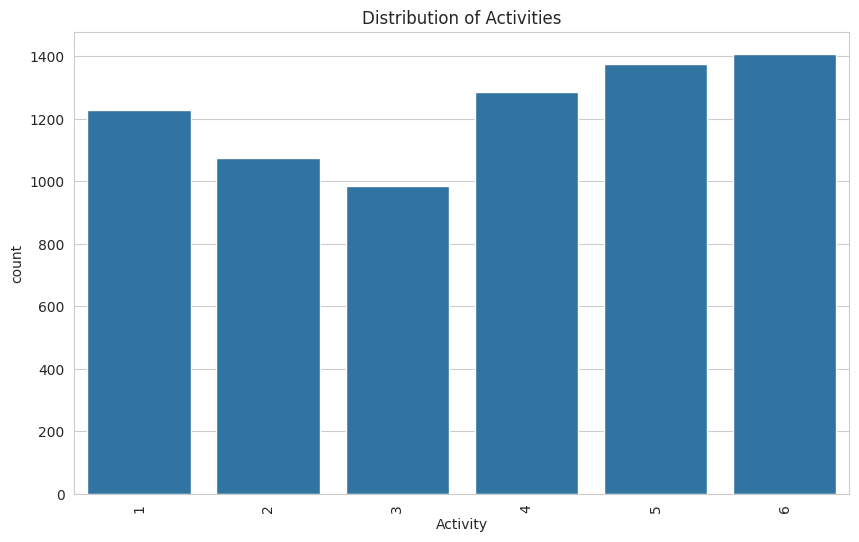

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style('whitegrid')

# Histogram of the activities
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['Activity'])
plt.title('Distribution of Activities')
plt.xticks(rotation=90)
plt.show()




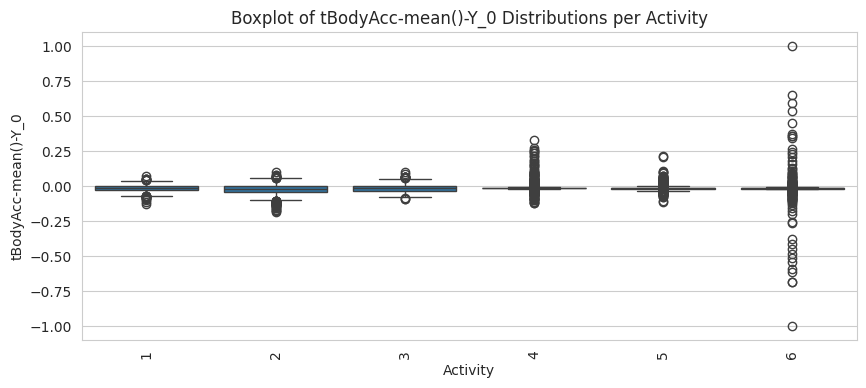

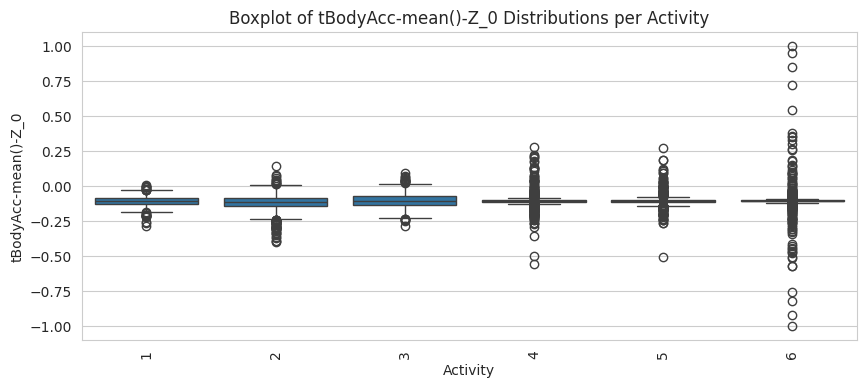

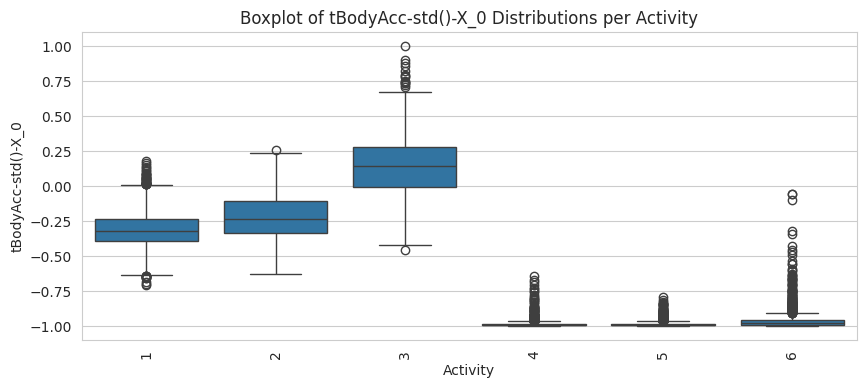

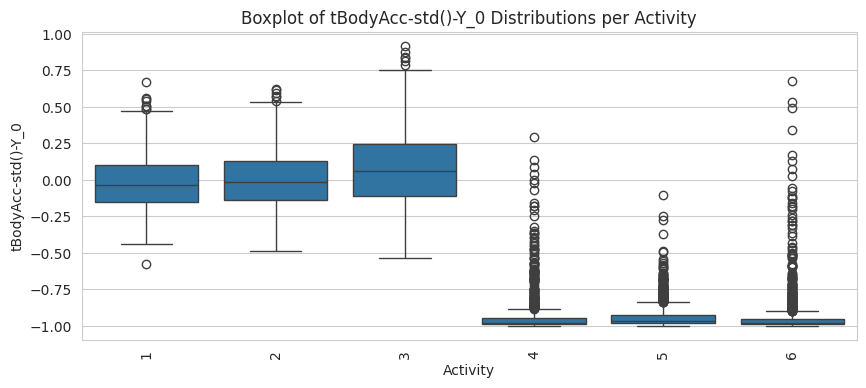

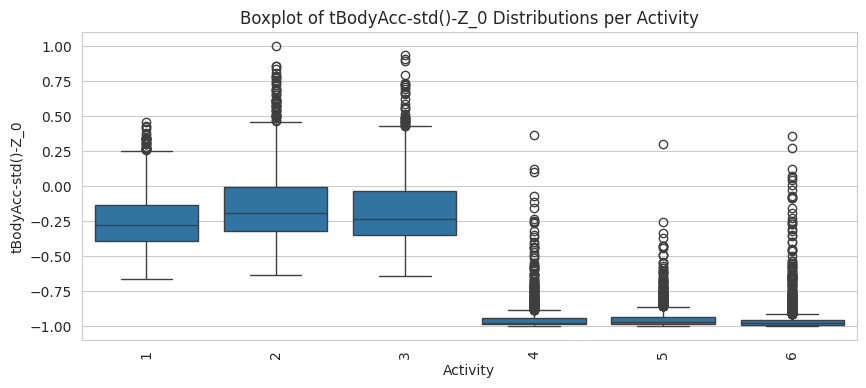

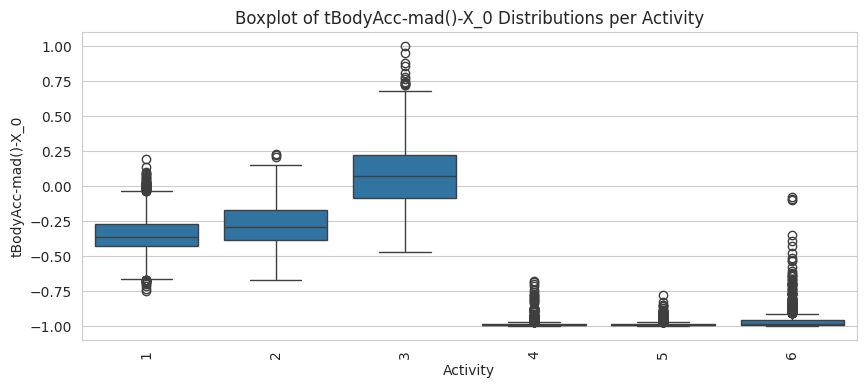

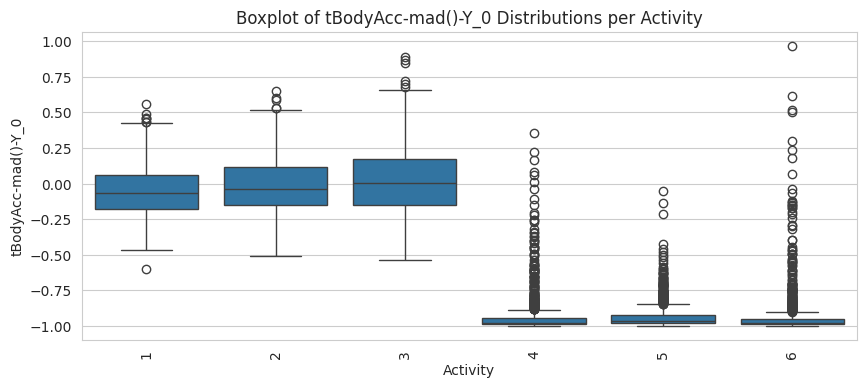

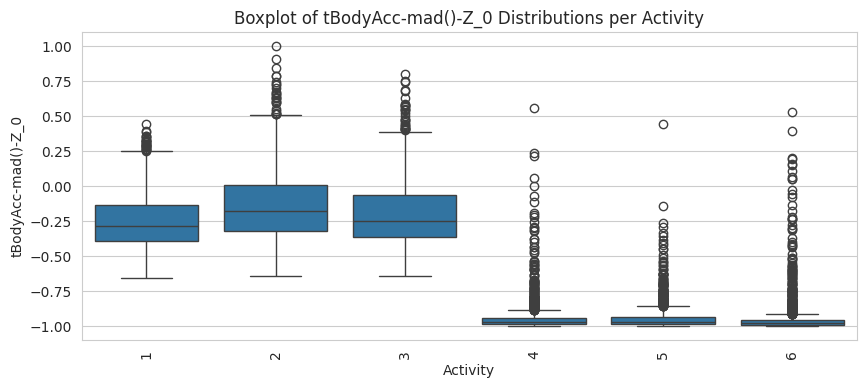

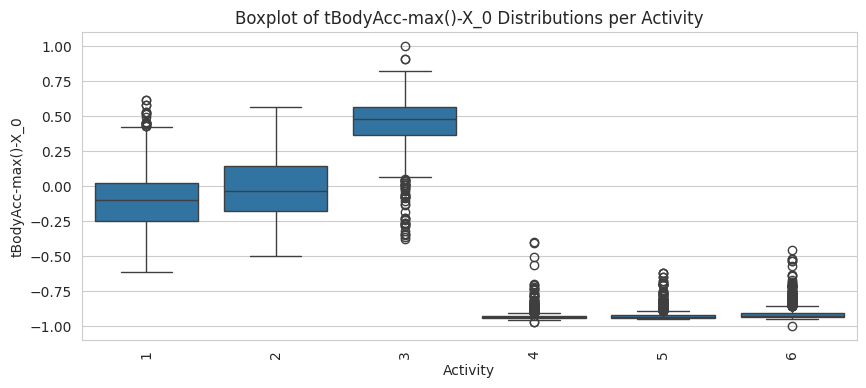

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style('whitegrid')

# Select a subset of features to plot
features_to_plot = train_data.columns[1:10]  # for example, the first ten features after the subject ID

# Plot a boxplot for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=train_data, x='Activity', y=feature)
    plt.title(f'Boxplot of {feature} Distributions per Activity')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
# Check the size (number of rows and columns) of the train_data
train_data_size = train_data.shape
print(f'Train Data Size: {train_data_size} (rows, columns)')

# Check the size (number of rows and columns) of the test_data
test_data_size = test_data.shape
print(f'Test Data Size: {test_data_size} (rows, columns)')


Train Data Size: (7352, 562) (rows, columns)
Test Data Size: (2947, 562) (rows, columns)


UPSCALING THE DATASET

In [ ]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

activity_counts = train_data['Activity'].value_counts()

# Identify majority and minority classes
majority_class_label = activity_counts.idxmax()
minority_class_label = activity_counts.idxmin()


# Upsample minority classes
train_data_minority = train_data[train_data['Activity'] == minority_class_label]

# Using pandas to oversample the minority classes to the size of the majority class
train_data_minority_upsampled = resample(train_data_minority,
                                         replace=True,     # sample with replacement
                                         n_samples=activity_counts[majority_class_label],  # to match majority class
                                         random_state=123) # reproducible results

# Combine the majority class with the upsampled minority class
train_data_upsampled = pd.concat([train_data[train_data['Activity'] != minority_class_label], train_data_minority_upsampled])

# SMOTE for all minority classes
X_train = train_data.drop('Activity', axis=1)
y_train = train_data['Activity']

sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Combine them back into a data frame
train_data_smote = pd.concat([pd.DataFrame(X_train_res), pd.DataFrame(y_train_res, columns=['Activity'])], axis=1)


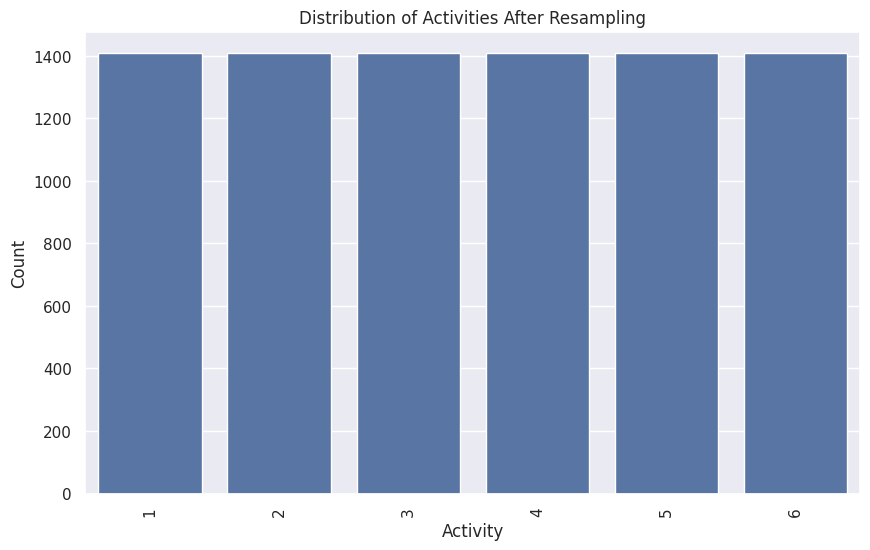

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=train_data_smote)
plt.title('Distribution of Activities After Resampling')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Activity')
plt.show()


In [ ]:
train_data = train_data_smote


In [ ]:
train_data.shape

(8442, 562)

Machine learning Algorithms

## Logistic regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
start_time = time.time()
# Separate features and labels for the training data
X_train = train_data.drop('Activity', axis=1)
y_train = train_data['Activity']

# Separate features and labels for the test data
X_test = test_data.drop('Activity', axis=1)
y_test = test_data['Activity']
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the logistic regression model with a maximum of 1000 iterations
logreg = LogisticRegression(max_iter=10000)

# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)
# Initialize the logistic regression model with a maximum of 1000 iterations
logreg = LogisticRegression(max_iter=10000)

# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)
# Predict on the scaled test data
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Accuracy: 0.9562266711910418
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.95      0.96       471
           3       0.99      0.94      0.96       420
           4       0.97      0.87      0.92       491
           5       0.89      0.98      0.93       532
           6       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
[[493   0   3   0   0   0]
 [ 21 449   1   0   0   0]
 [  7  17 395   0   1   0]
 [  0   2   0 428  60   1]
 [  1   0   0  12 519   0]
 [  0   0   0   0   3 534]]
Total runtime of the script: 38.01013517379761 seconds


Logistic Regression (TOP 20 features)

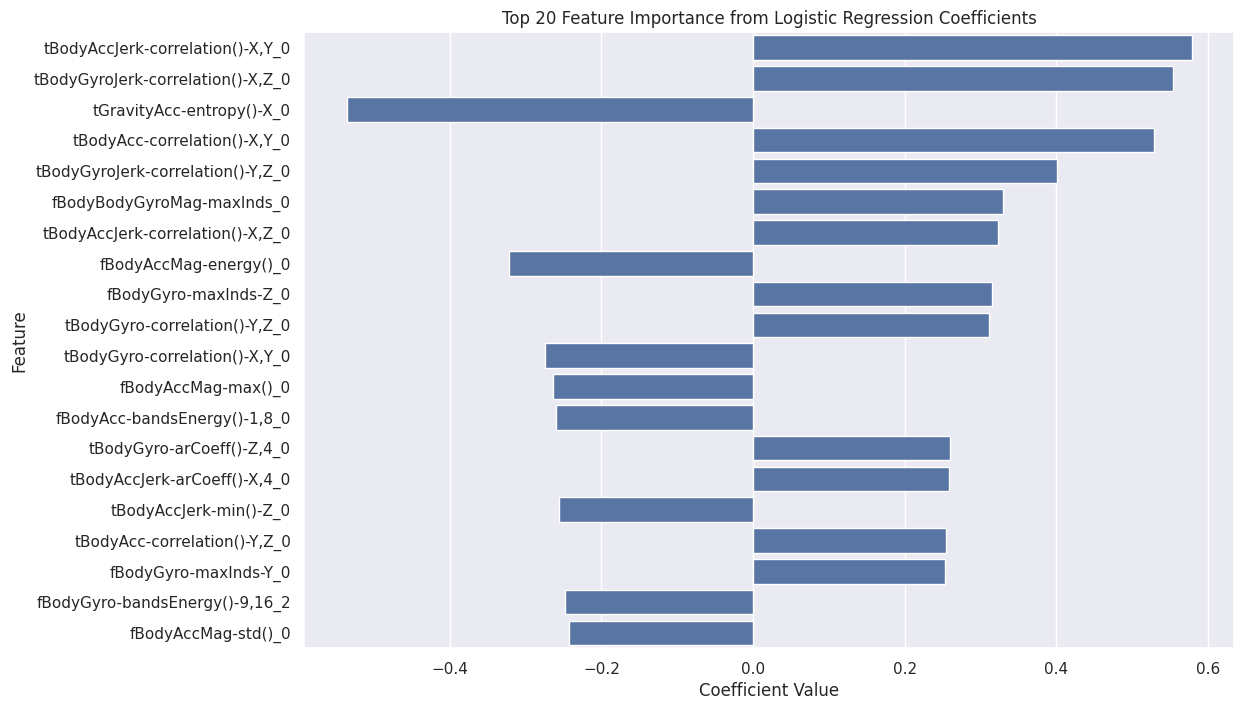

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Convert coefficients to odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame for the features and their corresponding coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Sort the features by the absolute value of their coefficients
feature_importance = feature_importance.reindex(
    feature_importance.Coefficient.abs().sort_values(ascending=False).index
)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Assuming 'feature_importance' is a DataFrame with a column 'Feature' that contains feature names
top_features = feature_importance['Feature'].head(20).tolist()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
start_time = time.time()
features = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/features.txt', delim_whitespace=True, header=None, usecols=[1])
feature_names = pd.Series(features[1]).astype(str)
unique_feature_names = feature_names + '_' + feature_names.groupby(feature_names).cumcount().astype(str)
unique_feature_names_list = unique_feature_names.tolist()
X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])
X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])

# Convert X_train and X_test to pandas DataFrames with unique feature names
X_train_df = pd.DataFrame(X_train.values, columns=unique_feature_names_list)
X_test_df = pd.DataFrame(X_test.values, columns=unique_feature_names_list)

# Initialize and fit the initial logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_df, y_train['Activity'])

# Get the coefficients and determine the top 20 features
coefficients = logreg.coef_[0]  # Assuming binary classification for simplicity
feature_importance = pd.DataFrame({
    'Feature': unique_feature_names_list,
    'Coefficient': coefficients
})
top_20_features = feature_importance.reindex(
    feature_importance.Coefficient.abs().sort_values(ascending=False).index
).head(20)['Feature']

# Subset the training and testing data to include only the top 20 features
X_train_top = X_train_df[top_20_features]
X_test_top = X_test_df[top_20_features]

# Train a new logistic regression model using only the top 20 features
logreg_top = LogisticRegression(max_iter=1000)
logreg_top.fit(X_train_top, y_train['Activity'])

# Predict and evaluate the new model
y_pred_top = logreg_top.predict(X_test_top)
accuracy_top = accuracy_score(y_test['Activity'], y_pred_top)
report_top = classification_report(y_test['Activity'], y_pred_top)

print(f"Accuracy with Top 20 Features: {accuracy_top}")
print(f"Classification Report with Top 20 Features:\n{report_top}")
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with Top 20 Features: 0.7702748557855447
Classification Report with Top 20 Features:
              precision    recall  f1-score   support

           1       0.86      0.98      0.92       496
           2       0.89      0.81      0.85       471
           3       0.93      0.90      0.91       420
           4       0.58      0.54      0.56       491
           5       0.66      0.73      0.69       532
           6       0.74      0.69      0.71       537

    accuracy                           0.77      2947
   macro avg       0.78      0.78      0.77      2947
weighted avg       0.77      0.77      0.77      2947

Total runtime of the script: 20.42689037322998 seconds


Logisitc Regression Using all important Features

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])
X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])

# Convert X_train and X_test to pandas DataFrames with unique feature names
X_train_df = pd.DataFrame(X_train.values, columns=unique_feature_names_list)
X_test_df = pd.DataFrame(X_test.values, columns=unique_feature_names_list)
# Initialize and fit the initial logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_df, y_train['Activity'])

# Get the coefficients
coefficients = logreg.coef_[0]  # Adjust this if it's a multi-class problem

# Define a threshold for important features
threshold = 0.1  # Adjust this threshold based on your criteria

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': unique_feature_names_list,
    'Coefficient': coefficients
})

# Filter out the important features
important_features = feature_importance[feature_importance['Coefficient'].abs() > threshold]

# Count of important features
count_important_features = important_features.shape[0]
print(f"Count of Important Features: {count_important_features}")

# Subset the training and testing data to include only the important features
X_train_important = X_train_df[important_features['Feature']]
X_test_important = X_test_df[important_features['Feature']]

# Train a new logistic regression model using only the important features
logreg_important = LogisticRegression(max_iter=1000)
logreg_important.fit(X_train_important, y_train['Activity'])

# Predict and evaluate the new model
y_pred_important = logreg_important.predict(X_test_important)
accuracy_important = accuracy_score(y_test['Activity'], y_pred_important)
report_important = classification_report(y_test['Activity'], y_pred_important)

print(f"Accuracy with Important Features: {accuracy_important}")
print(f"Classification Report with Important Features:\n{report_important}")

end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Count of Important Features: 310
Accuracy with Important Features: 0.9572446555819477
Classification Report with Important Features:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.95      0.95       471
           3       0.99      0.95      0.97       420
           4       0.96      0.87      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Total runtime of the script: 42.85001802444458 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression using PCA dimensionality reduction

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])
X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])

# Convert X_train and X_test to pandas DataFrames with unique feature names
X_train_df = pd.DataFrame(X_train.values, columns=unique_feature_names_list)
X_test_df = pd.DataFrame(X_test.values, columns=unique_feature_names_list)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retains 95% of variance; adjust as needed
X_train_pca = pca.fit_transform(X_train_df)
X_test_pca = pca.transform(X_test_df)

# Print the number of features extracted by PCA
print(f"Number of features after PCA: {X_train_pca.shape[1]}")

# Train logistic regression model on the PCA-transformed data
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train['Activity'])

# Predict and evaluate the new model
y_pred_pca = logreg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test['Activity'], y_pred_pca)
report_pca = classification_report(y_test['Activity'], y_pred_pca)

# Print model evaluation
print(f"Accuracy with PCA: {accuracy_pca}")
print(f"Classification Report with PCA:\n{report_pca}")

end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Number of features after PCA: 67
Accuracy with PCA: 0.9412962334577536
Classification Report with PCA:
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       496
           2       0.93      0.89      0.91       471
           3       0.95      0.94      0.94       420
           4       0.95      0.87      0.91       491
           5       0.89      0.96      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

Total runtime of the script: 5.136570930480957 seconds


Decision tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
start_time = time.time()

In [ ]:
# Initialize the DecisionTreeClassifier
max_dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
max_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test data
y_pred = max_dt_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Accuracy: 0.8622327790973872
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947

Confusion Matrix:
[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]
Total runtime of the script: 5.254436016082764 seconds


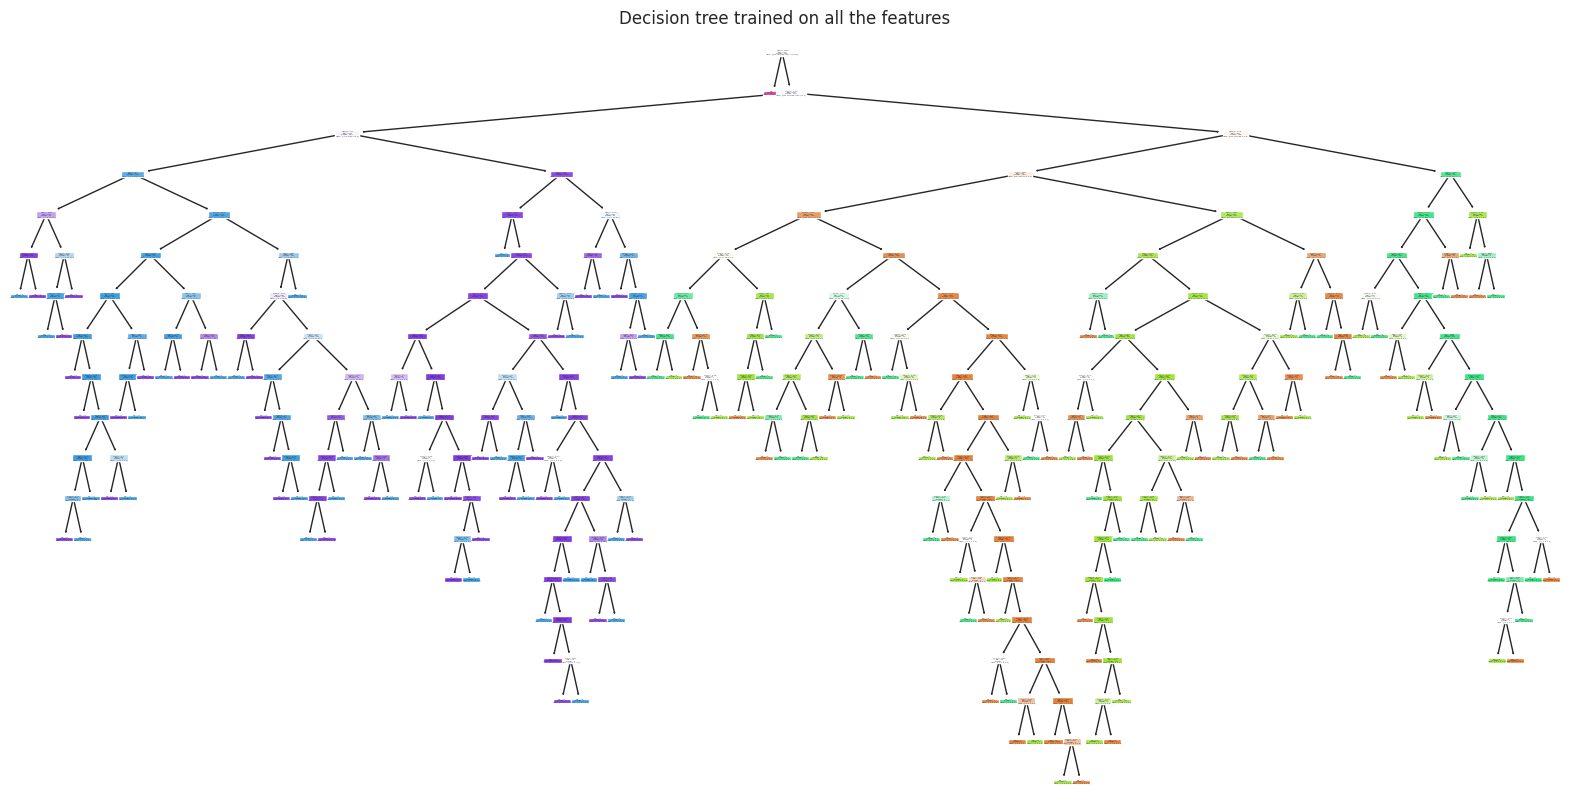

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(max_dt_classifier, filled=True)
plt.title('Decision tree trained on all the features')
plt.show()


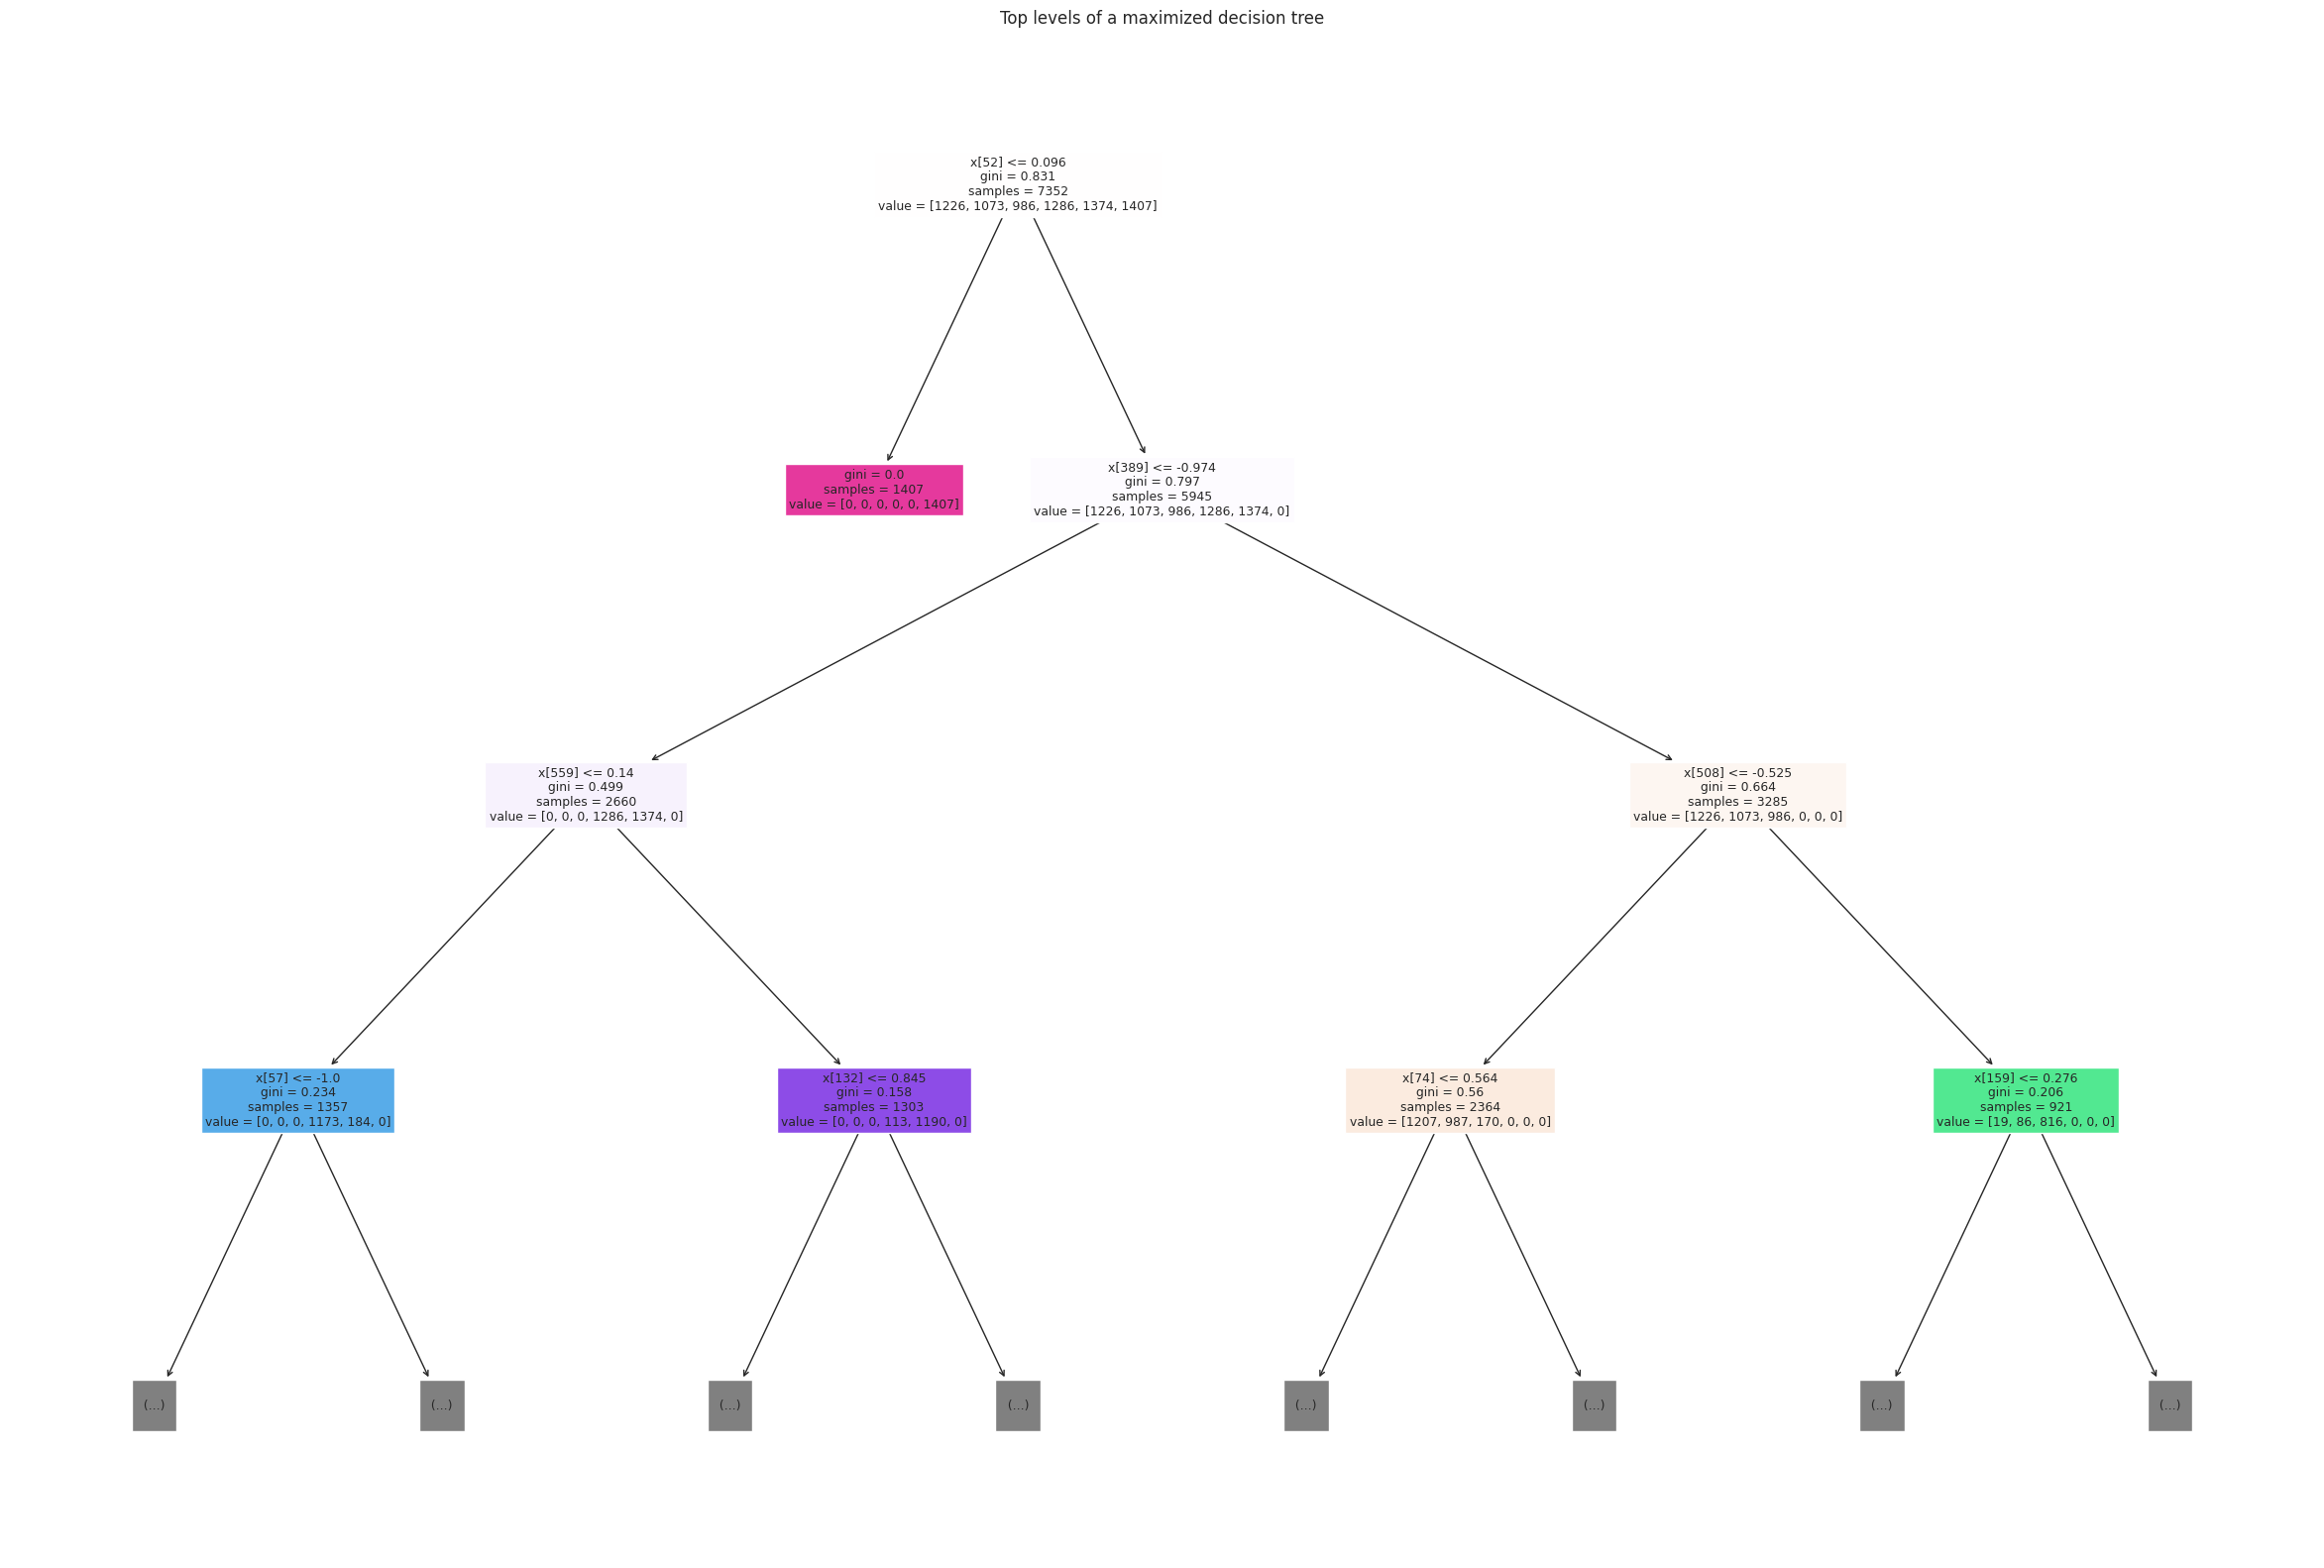

In [ ]:

plt.figure(figsize=(30, 20))  # Increase figure size
tree.plot_tree(max_dt_classifier, filled=True, max_depth=3)  # Visualize only the top 3 levels
plt.title('Top levels of a maximized decision tree')
plt.show()


Decision Tree using TOP 20 features

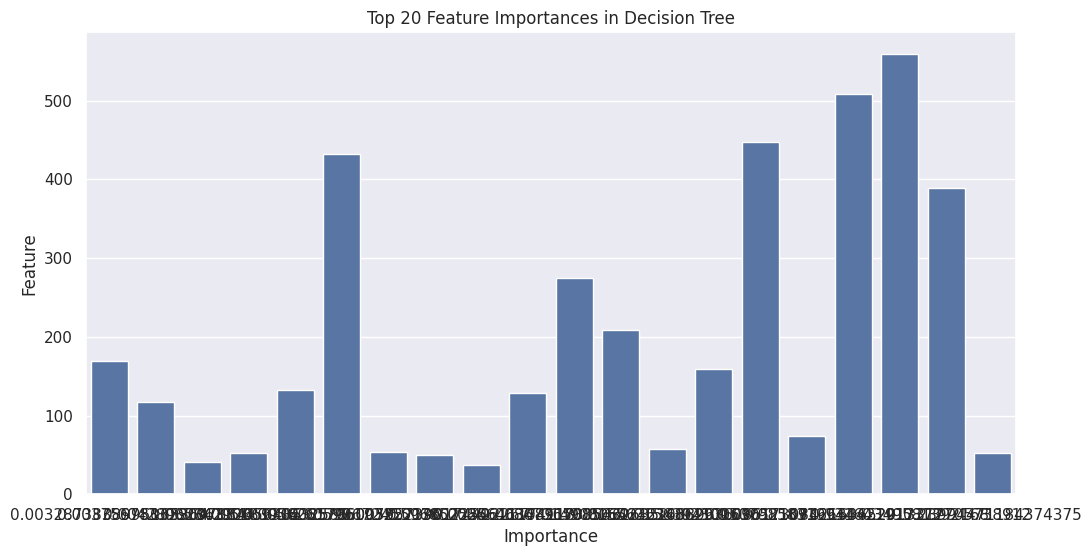

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

max_dt_importances =max_dt_classifier.feature_importances_

# Convert the importances into a DataFrame
max_dt_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': max_dt_importances})

# Sort the DataFrame to find the most important features
max_dt_feature_importance_df = max_dt_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=max_dt_feature_importance_df.head(20))
plt.title('Top 20 Feature Importances in Decision Tree')
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame to find the most important features
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = sorted_feature_importance_df.head(20)['Feature'].tolist()


# Subset the training and testing data to include only the top 20 features
X_train_top = X_train[top_20_features]
X_test_top = X_test[top_20_features]

# Train a new decision tree model using only the top 20 features
new_dt_classifier = DecisionTreeClassifier()
new_dt_classifier.fit(X_train_top, y_train)

# Predict and evaluate the new model
y_pred_top = new_dt_classifier.predict(X_test_top)
accuracy_top = accuracy_score(y_test, y_pred_top)
report_top = classification_report(y_test, y_pred_top)

# Print the model evaluation
print(f"\nAccuracy with Top 20 Features: {accuracy_top}")
print(f"Classification Report with Top 20 Features:\n{report_top}")
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Accuracy with Top 20 Features: 0.8513742789277231
Classification Report with Top 20 Features:
              precision    recall  f1-score   support

           1       0.80      0.91      0.85       496
           2       0.80      0.75      0.77       471
           3       0.87      0.80      0.84       420
           4       0.85      0.75      0.79       491
           5       0.79      0.88      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947

Total runtime of the script: 5.231691122055054 seconds


Decision tree considering all important features

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

start_time = time.time()

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Get the feature importances from the decision tree model
feature_importances = dt_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Define a threshold for important features
importance_threshold = 0.01  # Adjust this threshold based on your criteria

# Filter out the important features
important_features_df = feature_importance_df[feature_importance_df['Importance'] >= importance_threshold]
important_features = important_features_df['Feature'].tolist()

# Count of important features
count_important_features = len(important_features)
print(f"Count of Important Features: {count_important_features}")

# Subset the training and testing data to include only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train a new decision tree model using only the important features
new_dt_classifier_important = DecisionTreeClassifier()
new_dt_classifier_important.fit(X_train_important, y_train)

# Predict and evaluate the new model
y_pred_important = new_dt_classifier_important.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)
report_important = classification_report(y_test, y_pred_important)

# Print the model evaluation
print(f"\nAccuracy with Important Features: {accuracy_important}")
print(f"Classification Report with Important Features:\n{report_important}")

end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Count of Important Features: 9

Accuracy with Important Features: 0.8065829657278588
Classification Report with Important Features:
              precision    recall  f1-score   support

           1       0.80      0.79      0.79       496
           2       0.75      0.77      0.76       471
           3       0.78      0.76      0.77       420
           4       0.74      0.73      0.73       491
           5       0.75      0.77      0.76       532
           6       1.00      1.00      1.00       537

    accuracy                           0.81      2947
   macro avg       0.80      0.80      0.80      2947
weighted avg       0.81      0.81      0.81      2947

Total runtime of the script: 4.500830888748169 seconds


Decision Tree + PCA for dimensionality reduction

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

start_time = time.time()

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features after PCA
print(f"Number of features after PCA: {X_train_pca.shape[1]}")

# Train a decision tree model on the PCA-transformed data
dt_classifier_pca = DecisionTreeClassifier()
dt_classifier_pca.fit(X_train_pca, y_train)

# Predict and evaluate the new model
y_pred_pca = dt_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)

# Print model evaluation
print(f"Accuracy with PCA: {accuracy_pca}")
print(f"Classification Report with PCA:\n{report_pca}")

end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Number of features after PCA: 67
Accuracy with PCA: 0.8045469969460468
Classification Report with PCA:
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       496
           2       0.83      0.73      0.78       471
           3       0.77      0.77      0.77       420
           4       0.71      0.71      0.71       491
           5       0.74      0.77      0.75       532
           6       0.99      0.96      0.97       537

    accuracy                           0.80      2947
   macro avg       0.80      0.80      0.80      2947
weighted avg       0.81      0.80      0.80      2947

Total runtime of the script: 1.280519723892212 seconds


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
start_time = time.time()

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)


<ipython-input-31-27e3165c0a5b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')

# Generate a classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print(class_report_rf)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Accuracy: 0.9256871394638616
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       496
           2       0.90      0.89      0.89       471
           3       0.97      0.87      0.91       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947

Confusion Matrix:
[[482   8   6   0   0   0]
 [ 46 419   6   0   0   0]
 [ 15  41 364   0   0   0]
 [  0   0   0 435  56   0]
 [  0   0   0  41 491   0]
 [  0   0   0   0   0 537]]
Total runtime of the script: 11.704765558242798 seconds


TOP 20 features of RandomForest

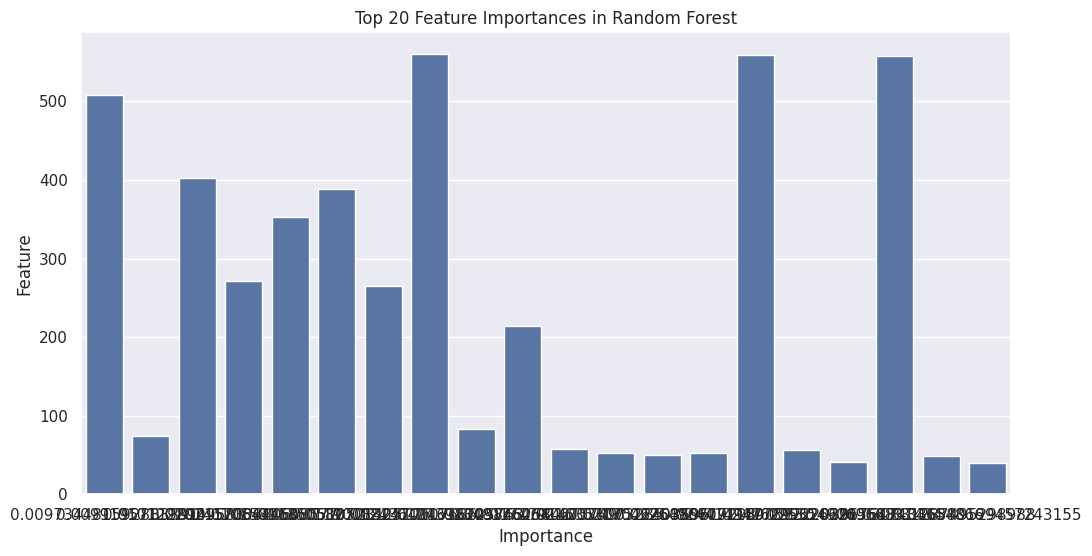

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame to find the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances in Random Forest')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Start the timer
start_time = time.time()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get the feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Convert the importances into a DataFrame and sort by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top 20 important features
top_20_features = feature_importance_df.head(20)['Feature']

# Subset the training and testing data to include only the top 20 features
X_train_top20 = X_train[top_20_features]
X_test_top20 = X_test[top_20_features]

# Train a new Random Forest model using only the top 20 features
new_rf_classifier_top20 = RandomForestClassifier()
new_rf_classifier_top20.fit(X_train_top20, y_train)

# Predict and evaluate the new model
y_pred_top20 = new_rf_classifier_top20.predict(X_test_top20)
accuracy_top20 = accuracy_score(y_test, y_pred_top20)

# Stop the timer
end_time = time.time()

# Print the model evaluation and total runtime
print(f"\nAccuracy with Top 20 Features: {accuracy_top20}")
print(f"Total runtime of the script: {end_time - start_time} seconds")


<ipython-input-35-bf248fc4a6b1>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)
<ipython-input-35-bf248fc4a6b1>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  new_rf_classifier_top20.fit(X_train_top20, y_train)



Accuracy with Top 20 Features: 0.823549372242959
Total runtime of the script: 13.454169511795044 seconds


Random Forest considering all important features.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get the feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Define a threshold for important features
importance_threshold = 0.01  # Adjust this threshold based on your criteria

# Filter out the important features
important_features_df = feature_importance_df[feature_importance_df['Importance'] >= importance_threshold]
important_features = important_features_df['Feature'].tolist()

# Count of important features
count_important_features = len(important_features)
print(f"Count of Important Features: {count_important_features}")

# Subset the training and testing data to include only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train a new Random Forest model using only the important features
new_rf_classifier = RandomForestClassifier()
new_rf_classifier.fit(X_train_important, y_train)

# Predict and evaluate the new model
y_pred_important = new_rf_classifier.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)

# Print the model evaluation
print(f"\nAccuracy with Important Features: {accuracy_important}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


<ipython-input-36-74dd205ad04f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Count of Important Features: 18


<ipython-input-36-74dd205ad04f>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  new_rf_classifier.fit(X_train_important, y_train)



Accuracy with Important Features: 0.8181201221581269
Total runtime of the script: 13.443874597549438 seconds


Random Forest + Dimensionality Reduction using PCA

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

start_time = time.time()

pca = PCA(n_components=0.95)  # Retains 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features after PCA
print(f"Number of features after PCA: {pca.n_components_}")

# Train a Random Forest model on the PCA-transformed data
rf_classifier_pca = RandomForestClassifier()
rf_classifier_pca.fit(X_train_pca, y_train)

# Predict and evaluate the new model
y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

end_time = time.time()

# Print the model evaluation and total runtime
print(f"Accuracy with PCA: {accuracy_pca}")
print(f"Total runtime of the script: {end_time - start_time} seconds")


Number of features after PCA: 67


<ipython-input-37-cdcdcf441592>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_pca.fit(X_train_pca, y_train)


Accuracy with PCA: 0.9053274516457415
Total runtime of the script: 5.521690130233765 seconds


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
start_time = time.time()

In [ ]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')

# Generate a classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(class_report_knn)

# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix_knn)
end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Accuracy: 0.9015948422124194
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.89      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.79      0.85       491
           5       0.83      0.93      0.88       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947

Confusion Matrix:
[[485   2   9   0   0   0]
 [ 40 424   7   0   0   0]
 [ 45  45 330   0   0   0]
 [  0   3   0 389  99   0]
 [  0   0   0  37 495   0]
 [  0   0   0   2   1 534]]
Total runtime of the script: 0.7534303665161133 seconds


OPTIMAL VALUE OF K

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time

start_time = time.time()

# Convert y_train to a 1D array
y_train_1d = y_train.values.ravel() if hasattr(y_train, "values") else y_train

# List to hold the average CV scores for different values of k
cv_scores = []

# Test values for k from 1 to a reasonable upper limit
k_range = range(1, 26)

# Perform 10-fold cross-validation for each value of k and store the scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train_1d, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the value of k that has the highest mean CV score
best_k = k_range[np.argmax(cv_scores)]
print(f'The optimal number of neighbors is {best_k}')

end_time = time.time()

# Calculate and print the total runtime
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


The optimal number of neighbors is 8
Total runtime of the script: 51.924986362457275 seconds


KNN + Dimensionality reduction using PCA

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

start_time = time.time()

y_train = y_train.squeeze().values
y_test = y_test.squeeze().values

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retains 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features retained by PCA
print(f"Number of features after PCA: {pca.n_components_}")

# Setting the range of n_neighbors for GridSearch
parameters = {'n_neighbors': range(1, 31)}

# Initialize KNN model
knn = KNeighborsClassifier()

# Apply GridSearchCV to find the optimal n_neighbors
clf = GridSearchCV(knn, parameters)
clf.fit(X_train_pca, y_train)

# Optimal n_neighbors
optimal_n = clf.best_params_['n_neighbors']
print(f"Optimal n_neighbors: {optimal_n}")

# Train KNN model with optimal n_neighbors
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_n)
knn_optimal.fit(X_train_pca, y_train)

# Predict and evaluate the model
y_pred = knn_optimal.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

# Print the model evaluation and total runtime
print(f"Accuracy with PCA and KNN (n={optimal_n}): {accuracy}")
print(f"Total runtime of the script: {end_time - start_time} seconds")


Number of features after PCA: 67
Optimal n_neighbors: 19
Accuracy with PCA and KNN (n=19): 0.9039701391245334
Total runtime of the script: 16.546588897705078 seconds


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Ensure y_train is a 1D array
y_train_1d = y_train.ravel() if hasattr(y_train, "values") else y_train

# Define the range of k values to test
k_values = range(1, 11)

# Store accuracies for each value of k
accuracies = []

# Test each value of k
for k in k_values:
    # Create and fit the KNN classifier
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_1d)  # Use the 1D version of y_train

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    time_taken = time.time() - start_time
    print(f'Accuracy for k={k}: {accuracy:.4f}, Time taken: {time_taken:.4f} seconds')

# Find the best k value and its corresponding accuracy
best_k = k_values[accuracies.index(max(accuracies))]
print(f'The best accuracy is {max(accuracies):.4f} with k={best_k}')


Accuracy for k=1: 0.8785, Time taken: 0.7116 seconds
Accuracy for k=2: 0.8612, Time taken: 0.7263 seconds
Accuracy for k=3: 0.8907, Time taken: 0.7094 seconds
Accuracy for k=4: 0.8911, Time taken: 0.7245 seconds
Accuracy for k=5: 0.9016, Time taken: 0.7233 seconds
Accuracy for k=6: 0.9013, Time taken: 0.7102 seconds
Accuracy for k=7: 0.9033, Time taken: 0.8482 seconds
Accuracy for k=8: 0.9074, Time taken: 0.9684 seconds
Accuracy for k=9: 0.9053, Time taken: 0.8979 seconds
Accuracy for k=10: 0.9067, Time taken: 0.7236 seconds
The best accuracy is 0.9074 with k=8


Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
start_time = time.time()

In [ ]:
# Initialize the GaussianNB classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')

# Generate a classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print('Classification Report:')
print(class_report_nb)

# Generate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix_nb)
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Accuracy: 0.7702748557855447
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       496
           2       0.76      0.96      0.84       471
           3       0.83      0.61      0.70       420
           4       0.58      0.75      0.65       491
           5       0.80      0.86      0.83       532
           6       0.96      0.60      0.74       537

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947

Confusion Matrix:
[[416  38  42   0   0   0]
 [  9 451  11   0   0   0]
 [ 80  83 257   0   0   0]
 [  0   7   0 368 111   5]
 [  0  15   0  54 455   8]
 [  0   3   0 211   0 323]]
Total runtime of the script: 0.08523416519165039 seconds


Navie Bayes + dimensionality reduction using PCA

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

start_time = time.time()

pca = PCA(n_components=0.95)  # Retains 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features retained by PCA
print(f"Number of features after PCA: {pca.n_components_}")

# Train a Naive Bayes model on the PCA-transformed data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)

# Predict and evaluate the new model
y_pred = nb_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

# Print the model evaluation and total runtime
print(f"Accuracy with PCA and Naive Bayes: {accuracy}")
print(f"Total runtime of the script: {end_time - start_time} seconds")


Number of features after PCA: 67
Accuracy with PCA and Naive Bayes: 0.8768238887003733
Total runtime of the script: 0.5932509899139404 seconds


Support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
start_time = time.time()

In [ ]:
# Initialize the SVC classifier with the RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')

# Generate a classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report_svm)

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Accuracy: 0.9504580929759077
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Confusion Matrix:
[[488   5   3   0   0   0]
 [ 20 451   0   0   0   0]
 [ 10  26 384   0   0   0]
 [  0   2   0 438  51   0]
 [  0   0   0  29 503   0]
 [  0   0   0   0   0 537]]
Total runtime of the script: 2.7917253971099854 seconds


svm + dimensionality reduction using PCA

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

start_time = time.time()

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the number of features retained by PCA
print(f"Number of features after PCA: {pca.n_components_}")

# Train an SVM model on the PCA-transformed data
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Predict and evaluate the model
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

end_time = time.time()

# Print the model evaluation and total runtime
print(f"Accuracy with PCA and SVM: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Total runtime of the script: {end_time - start_time} seconds")


Number of features after PCA: 67
Accuracy with PCA and SVM: 0.9406175771971497
Confusion Matrix:
[[474  15   7   0   0   0]
 [ 24 445   2   0   0   0]
 [  7  40 373   0   0   0]
 [  0   2   0 437  52   0]
 [  0   0   0  26 506   0]
 [  0   0   0   0   0 537]]
Total runtime of the script: 1.2979323863983154 seconds


Ensemble method

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
start_time = time.time()

In [ ]:
# Initialize the individual classifiers
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)  # Enable probability estimates for SVC
knn_clf = KNeighborsClassifier()


In [ ]:
# Create a voting classifier for ensemble learning
ensemble_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('svm', svm_clf),
        ('knn', knn_clf)
    ],
    voting='hard'  # or 'soft' for averaging probabilities
)


In [ ]:
# Fit the ensemble classifier to the training data
ensemble_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())])

In [ ]:
# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy_ensemble}')

# Generate a classification report
class_report_ensemble = classification_report(y_test, y_pred_ensemble)
print('Ensemble Classification Report:')
print(class_report_ensemble)
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Ensemble Accuracy: 0.9480827960637936
Ensemble Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       0.92      0.94      0.93       471
           3       0.99      0.90      0.94       420
           4       0.93      0.91      0.92       491
           5       0.92      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Total runtime of the script: 14.413011312484741 seconds


RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
start_time = time.time()

In [ ]:

X_train = np.array(train_data.drop('Activity', axis=1))
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_train = np.array(train_data['Activity'])

# Extract features and labels from the test data
X_test = np.array(test_data.drop('Activity', axis=1))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_test = np.array(test_data['Activity'])

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Standardize the features (optional, depends on your specific dataset)
scaler = StandardScaler()
X_train = np.array([scaler.fit_transform(x) for x in X_train])
X_test = np.array([scaler.transform(x) for x in X_test])


In [ ]:
# Define the RNN model structure
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
119/119 [==============================] - 1s 4ms/step - loss: 1.9331 - accuracy: 0.1755 - val_loss: 1.9646 - val_accuracy: 0.0000e+00
Epoch 2/10
119/119 [==============================] - 0s 2ms/step - loss: 1.9109 - accuracy: 0.1830 - val_loss: 1.9787 - val_accuracy: 0.0000e+00
Epoch 3/10
119/119 [==============================] - 0s 2ms/step - loss: 1.8935 - accuracy: 0.1815 - val_loss: 1.9888 - val_accuracy: 0.0000e+00
Epoch 4/10
119/119 [==============================] - 0s 2ms/step - loss: 1.8797 - accuracy: 0.1852 - val_loss: 1.9944 - val_accuracy: 0.0000e+00
Epoch 5/10
119/119 [==============================] - 0s 2ms/step - loss: 1.8685 - accuracy: 0.1815 - val_loss: 1.9944 - val_accuracy: 0.0000e+00
Epoch 6/10
119/119 [==============================] - 0s 2ms/step - loss: 1.8592 - accuracy: 0.1802 - val_loss: 1.9951 - val_accuracy: 0.0000e+00
Epoch 7/10
119/119 [==============================] - 0s 2ms/step - loss: 1.8514 - accuracy: 0.1852 - val_loss: 1.9977 - val

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

93/93 [==============================] - 0s 1ms/step - loss: 1.7745 - accuracy: 0.2935
Test Accuracy: 0.2935188412666321
Total runtime of the script: 9.1279935836792 seconds


Dimensionality reduction

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

# Train a RandomForest Classifier on the original data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Time the prediction for the original model
start_time = time.time()
original_preds = rf.predict(X_test)
end_time = time.time()
original_predict_time = end_time - start_time
original_accuracy = accuracy_score(y_test, original_preds)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the same model on the reduced data
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)

# Time the prediction for the PCA-reduced model
start_time = time.time()
pca_preds = rf_pca.predict(X_test_pca)
end_time = time.time()
pca_predict_time = end_time - start_time
pca_accuracy = accuracy_score(y_test, pca_preds)

# Print results
print(f"Original Data Accuracy: {original_accuracy}")
print(f"Original Data Prediction Time: {original_predict_time} seconds")
print(f"PCA Reduced Data Accuracy: {pca_accuracy}")
print(f"PCA Reduced Data Prediction Time: {pca_predict_time} seconds")
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")


Original Data Accuracy: 0.9243298269426535
Original Data Prediction Time: 0.04893016815185547 seconds
PCA Reduced Data Accuracy: 0.9049881235154394
PCA Reduced Data Prediction Time: 0.03856778144836426 seconds
Original number of features: 561
Reduced number of features: 67


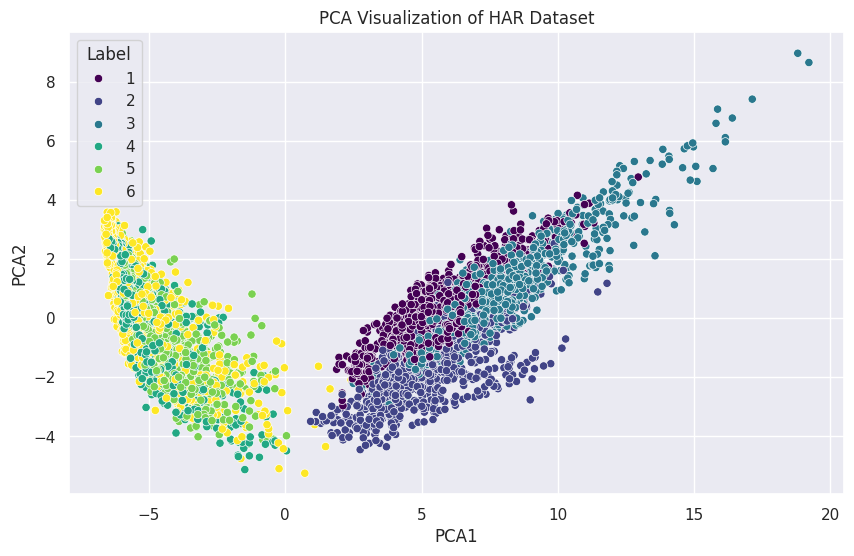

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Create a DataFrame for visualization
pca_df = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Label': y_train.squeeze()})

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Label', data=pca_df, palette='viridis', legend="full")
plt.title('PCA Visualization of HAR Dataset')
plt.show()


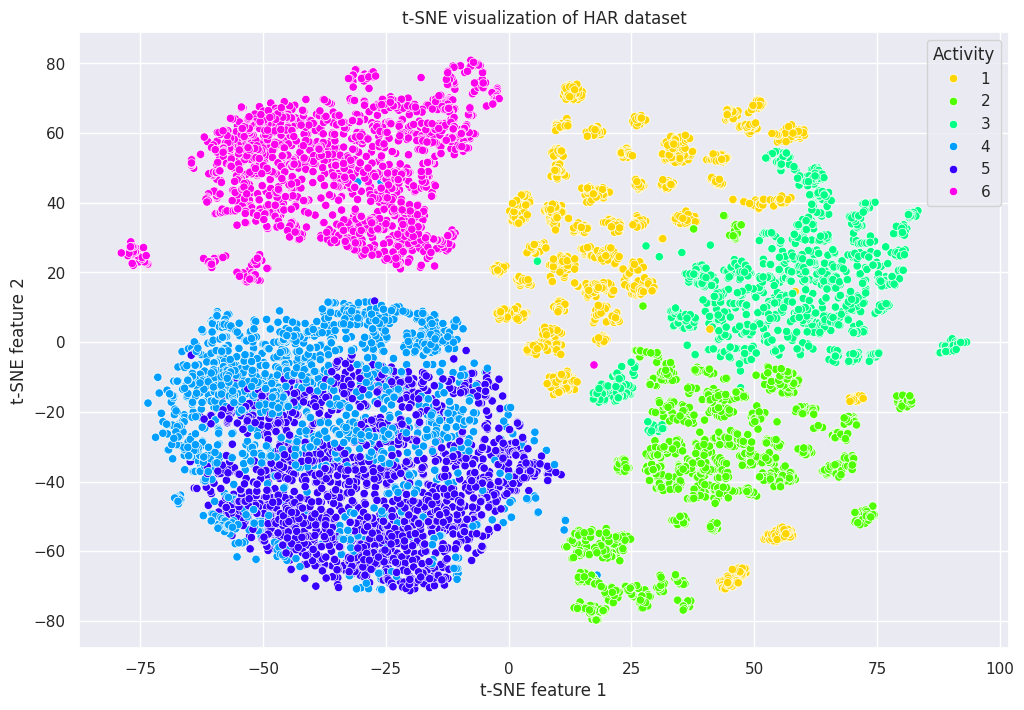

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Label': y_combined})

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Label', palette=sns.color_palette("hsv", len(y_combined.unique())), data=tsne_df)
plt.title('t-SNE visualization of HAR dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(loc='best', title='Activity')
plt.show()


In [ ]:
import pandas as pd
import time
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Prepare the data for modeling
X_train = train_data.drop('Activity', axis=1)
y_train = train_data['Activity']
X_test = test_data.drop('Activity', axis=1)
y_test = test_data['Activity']

# Dictionary to store the results
results = {}

# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iterate through models and compute metrics
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    results[name] = {'Time': elapsed_time, 'Accuracy': accuracy, 'Confusion Matrix': conf_matrix}

# Print the results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Time Taken: {metrics['Time']} seconds")
    print(f"Accuracy: {metrics['Accuracy'] * 100}%")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Time Taken: 1.6027653217315674 seconds
Accuracy: 95.82626399728538%
Confusion Matrix:
[[495   1   0   0   0   0]
 [ 26 444   1   0   0   0]
 [  5  11 404   0   0   0]
 [  0   3   0 424  64   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


Model: Decision Tree
Time Taken: 6.342486143112183 seconds
Accuracy: 86.25721072276892%
Confusion Matrix:
[[443  37  16   0   0   0]
 [ 64 363  44   0   0   0]
 [ 12  49 359   0   0   0]
 [  0   0   0 385 106   0]
 [  0   0   0  77 455   0]
 [  0   0   0   0   0 537]]


Model: Random Forest
Time Taken: 13.785471200942993 seconds
Accuracy: 92.22938581608415%
Confusion Matrix:
[[477  13   6   0   0   0]
 [ 44 420   7   0   0   0]
 [ 18  41 361   0   0   0]
 [  0   0   0 433  58   0]
 [  0   0   0  42 490   0]
 [  0   0   0   0   0 537]]


Model: SVM
Time Taken: 2.7446093559265137 seconds
Accuracy: 95.18154054971157%
Confusion Matrix:
[[486   7   3   0   0   0]
 [ 21 450   0   0   0   0]
 [  8  24 388   0   0   0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Time Taken: 1.9931554794311523 seconds
Accuracy: 95.99592806243638%


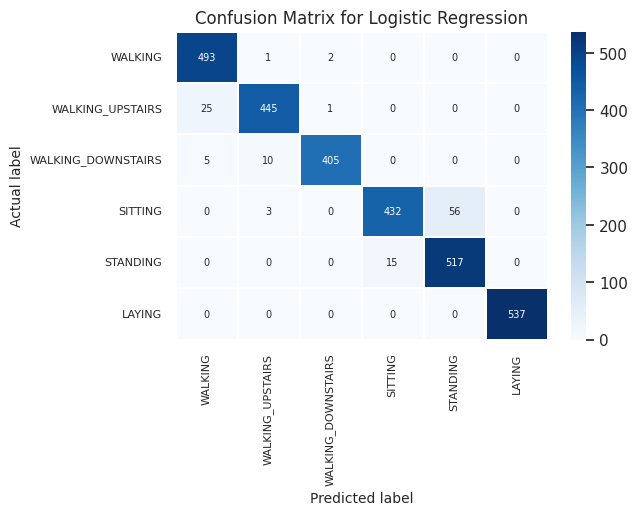

Model: Decision Tree
Time Taken: 6.356986045837402 seconds
Accuracy: 86.46080760095012%


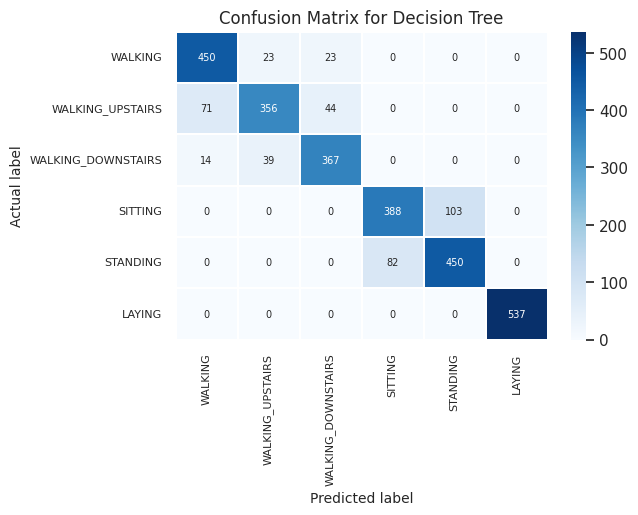

Model: Random Forest
Time Taken: 13.684081554412842 seconds
Accuracy: 92.39904988123516%


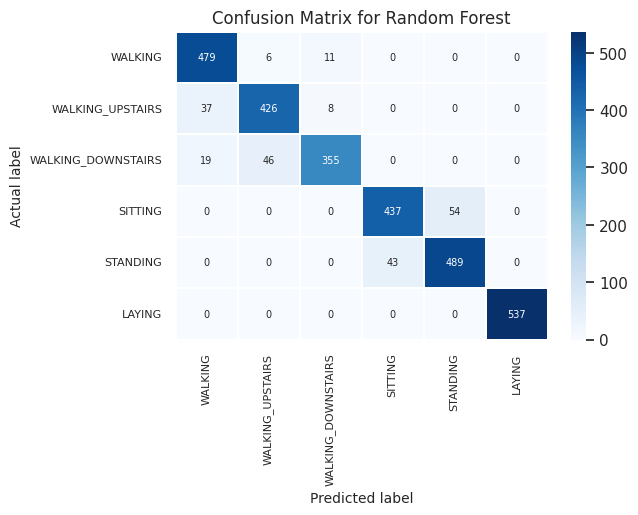

Model: SVM
Time Taken: 3.230341672897339 seconds
Accuracy: 95.18154054971157%


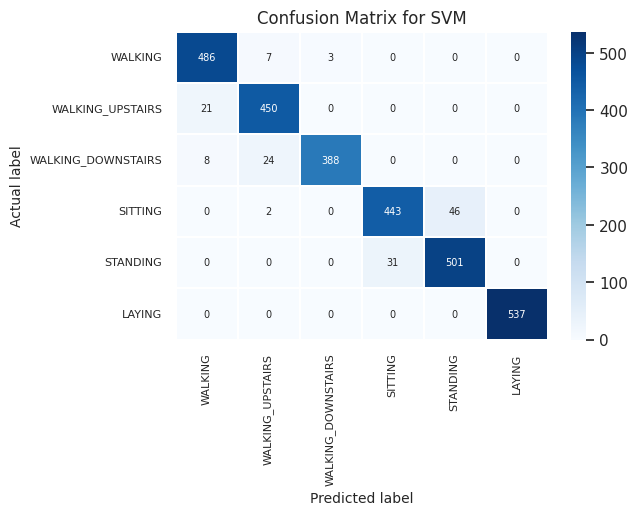

Model: KNN
Time Taken: 0.819171667098999 seconds
Accuracy: 90.49881235154395%


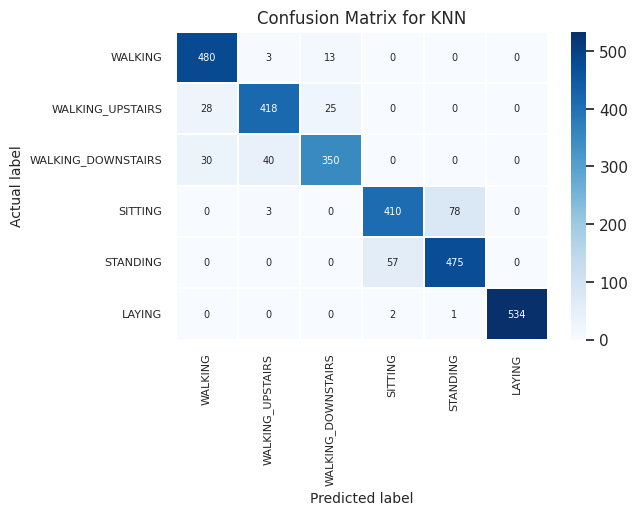

Model: Naive Bayes
Time Taken: 0.06731772422790527 seconds
Accuracy: 75.12724804886325%


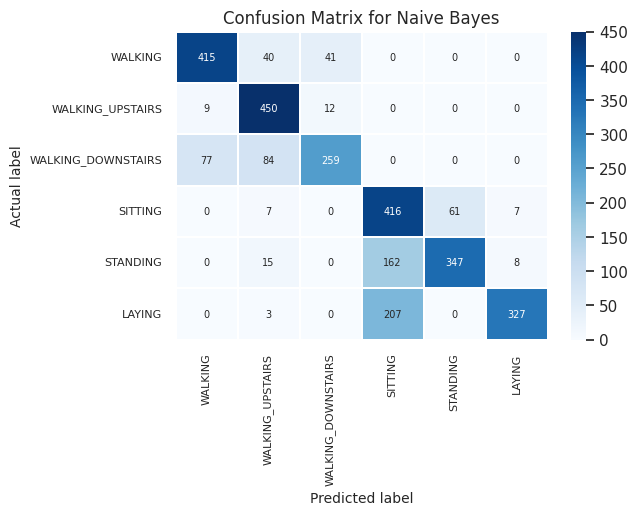

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

y_train = np.vectorize(activity_labels.get)(y_train)
y_test = np.vectorize(activity_labels.get)(y_test)

# Dictionary to store the results
results = {}

# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))  # Reduced size
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.3, cmap="Blues",
                xticklabels=activity_labels.values(), yticklabels=activity_labels.values(),
                annot_kws={"size": 7})  # Reduced annotation size
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label', fontsize=10)  # Reduced font size for y-axis
    plt.xlabel('Predicted label', fontsize=10)  # Reduced font size for x-axis
    plt.xticks(fontsize=8)  # Reduced font size for x-axis tick labels
    plt.yticks(fontsize=8)  # Reduced font size for y-axis tick labels
    plt.show()

# Iterate through models, compute metrics, and plot confusion matrices
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    elapsed_time = time.time() - start_time
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model: {name}")
    print(f"Time Taken: {elapsed_time} seconds")
    print(f"Accuracy: {accuracy * 100}%")
    conf_matrix = confusion_matrix(y_test, predictions, labels=list(activity_labels.values()))
    results[name] = {'Time': elapsed_time, 'Accuracy': accuracy, 'Confusion Matrix': conf_matrix}
    plot_confusion_matrix(conf_matrix, name)


1D CNN  with kernal size=3 ,Filters =64 ,activation =relu ,Max pooling size =2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
start_time = time.time()
X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the data for CNN input, CNN requires 3D input
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

# Convert y_train and y_test to NumPy arrays if they are DataFrames
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train_array.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test_array.reshape(-1, 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test accuracy: {accuracy}')
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


230/230 [==============================] - 6s 22ms/step - loss: 0.4053 - accuracy: 0.8502 - val_loss: 0.1949 - val_accuracy: 0.9376
Epoch 2/10
230/230 [==============================] - 4s 19ms/step - loss: 0.1067 - accuracy: 0.9614 - val_loss: 0.1317 - val_accuracy: 0.9528
Epoch 3/10
230/230 [==============================] - 5s 23ms/step - loss: 0.0649 - accuracy: 0.9780 - val_loss: 0.1173 - val_accuracy: 0.9566
Epoch 4/10
230/230 [==============================] - 5s 21ms/step - loss: 0.0510 - accuracy: 0.9801 - val_loss: 0.1747 - val_accuracy: 0.9362
Epoch 5/10
230/230 [==============================] - 6s 24ms/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 0.1111 - val_accuracy: 0.9586
Epoch 6/10
230/230 [==============================] - 5s 20ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.1830 - val_accuracy: 0.9379
Epoch 7/10
230/230 [==============================] - 5s 20ms/step - loss: 0.0356 - accuracy: 0.9874 - val_loss: 0.1133 - val_accuracy: 0.9630
Epoch 8/10

RELU ACTIVATION FUNCTION

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import time

start_time = time.time()

start_time = time.time()
X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the data for CNN input, CNN requires 3D input
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

# Convert y_train and y_test to NumPy arrays if they are DataFrames
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

def create_model(n_filters, kernel_size, pool_size, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(y_train_encoded.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

filter_options = [32, 64, 128]
kernel_sizes = [3, 5, 7]
pool_sizes = [2, 3, 5]
learning_rate = 0.001

best_accuracy = 0
best_configuration = None
best_time = None

for n_filters in filter_options:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            start_time = time.time()
            model = create_model(n_filters, kernel_size, pool_size, learning_rate)
            model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, verbose=0)  # Set verbose=0 for less output
            loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f'Filters: {n_filters}, Kernel Size: {kernel_size}, Pool Size: {pool_size}, Accuracy: {accuracy}, Time: {elapsed_time:.2f} seconds')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_configuration = (n_filters, kernel_size, pool_size)
                best_time = elapsed_time

print(f'Best configuration: Filters: {best_configuration[0]}, Kernel Size: {best_configuration[1]}, Pool Size: {best_configuration[2]}, Accuracy: {best_accuracy}, Time: {best_time:.2f} seconds')
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")



Filters: 32, Kernel Size: 3, Pool Size: 2, Accuracy: 0.9552086591720581, Time: 23.88 seconds
Filters: 32, Kernel Size: 3, Pool Size: 3, Accuracy: 0.9582626223564148, Time: 20.58 seconds
Filters: 32, Kernel Size: 3, Pool Size: 5, Accuracy: 0.9484221339225769, Time: 16.64 seconds
Filters: 32, Kernel Size: 5, Pool Size: 2, Accuracy: 0.9616559147834778, Time: 42.07 seconds
Filters: 32, Kernel Size: 5, Pool Size: 3, Accuracy: 0.9586019515991211, Time: 21.63 seconds
Filters: 32, Kernel Size: 5, Pool Size: 5, Accuracy: 0.9446895122528076, Time: 17.29 seconds
Filters: 32, Kernel Size: 7, Pool Size: 2, Accuracy: 0.9636918902397156, Time: 30.84 seconds
Filters: 32, Kernel Size: 7, Pool Size: 3, Accuracy: 0.9334917068481445, Time: 25.17 seconds
Filters: 32, Kernel Size: 7, Pool Size: 5, Accuracy: 0.9535120725631714, Time: 18.81 seconds
Filters: 64, Kernel Size: 3, Pool Size: 2, Accuracy: 0.8737699389457703, Time: 41.68 seconds
Filters: 64, Kernel Size: 3, Pool Size: 3, Accuracy: 0.954869329929351

Sigmoid Activation function

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import time

start_time = time.time()

start_time = time.time()
X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None, names=unique_feature_names_list)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the data for CNN input, CNN requires 3D input
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

# Convert y_train and y_test to NumPy arrays if they are DataFrames
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

def create_model(n_filters, kernel_size, pool_size, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=kernel_size, activation='sigmoid', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(y_train_encoded.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

filter_options = [32, 64, 128]
kernel_sizes = [3, 5, 7]
pool_sizes = [2, 3, 5]
learning_rate = 0.001

best_accuracy = 0
best_configuration = None
best_time = None

for n_filters in filter_options:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            start_time = time.time()
            model = create_model(n_filters, kernel_size, pool_size, learning_rate)
            model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, verbose=0)  # Set verbose=0 for less output
            loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f'Filters: {n_filters}, Kernel Size: {kernel_size}, Pool Size: {pool_size}, Accuracy: {accuracy}, Time: {elapsed_time:.2f} seconds')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_configuration = (n_filters, kernel_size, pool_size)
                best_time = elapsed_time

print(f'Best configuration: Filters: {best_configuration[0]}, Kernel Size: {best_configuration[1]}, Pool Size: {best_configuration[2]}, Accuracy: {best_accuracy}, Time: {best_time:.2f} seconds')
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")



Filters: 32, Kernel Size: 3, Pool Size: 2, Accuracy: 0.18221920728683472, Time: 26.33 seconds
Filters: 32, Kernel Size: 3, Pool Size: 3, Accuracy: 0.18221920728683472, Time: 41.98 seconds
Filters: 32, Kernel Size: 3, Pool Size: 5, Accuracy: 0.18221920728683472, Time: 18.60 seconds
Filters: 32, Kernel Size: 5, Pool Size: 2, Accuracy: 0.9114353656768799, Time: 35.61 seconds
Filters: 32, Kernel Size: 5, Pool Size: 3, Accuracy: 0.41194435954093933, Time: 23.37 seconds
Filters: 32, Kernel Size: 5, Pool Size: 5, Accuracy: 0.8754665851593018, Time: 19.26 seconds
Filters: 32, Kernel Size: 7, Pool Size: 2, Accuracy: 0.18221920728683472, Time: 28.03 seconds
Filters: 32, Kernel Size: 7, Pool Size: 3, Accuracy: 0.18221920728683472, Time: 24.65 seconds
Filters: 32, Kernel Size: 7, Pool Size: 5, Accuracy: 0.18221920728683472, Time: 21.51 seconds
Filters: 64, Kernel Size: 3, Pool Size: 2, Accuracy: 0.18221920728683472, Time: 44.14 seconds
Filters: 64, Kernel Size: 3, Pool Size: 3, Accuracy: 0.8985409

TANH ACTIVATION

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import time

start_time = time.time()

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_train_array = X_train.values
X_test_array = X_test.values

X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

def create_model(n_filters, kernel_size, pool_size, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=kernel_size, activation='tanh', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(y_train_encoded.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

filter_options = [32, 64, 128]
kernel_sizes = [3, 5, 7]
pool_sizes = [2, 3, 5]

best_accuracy = 0
best_configuration = None
best_time = None

for n_filters in filter_options:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            start_time = time.time()
            model = create_model(n_filters, kernel_size, pool_size, learning_rate)
            model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, verbose=0)
            loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f'Tanh - Filters: {n_filters}, Kernel Size: {kernel_size}, Pool Size: {pool_size}, Accuracy: {accuracy}, Time: {elapsed_time:.2f} seconds')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_configuration = (n_filters, kernel_size, pool_size)
                best_time = elapsed_time

print(f'Best configuration with Tanh: Filters: {best_configuration[0]}, Kernel Size: {best_configuration[1]}, Pool Size: {best_configuration[2]}, Accuracy: {best_accuracy}, Time: {best_time:.2f} seconds')
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Tanh - Filters: 32, Kernel Size: 3, Pool Size: 2, Accuracy: 0.9558873176574707, Time: 25.46 seconds
Tanh - Filters: 32, Kernel Size: 3, Pool Size: 3, Accuracy: 0.9609772562980652, Time: 21.57 seconds
Tanh - Filters: 32, Kernel Size: 3, Pool Size: 5, Accuracy: 0.9300984144210815, Time: 17.92 seconds
Tanh - Filters: 32, Kernel Size: 5, Pool Size: 2, Accuracy: 0.9599592685699463, Time: 42.04 seconds
Tanh - Filters: 32, Kernel Size: 5, Pool Size: 3, Accuracy: 0.966406524181366, Time: 22.78 seconds
Tanh - Filters: 32, Kernel Size: 5, Pool Size: 5, Accuracy: 0.9575839638710022, Time: 19.42 seconds
Tanh - Filters: 32, Kernel Size: 7, Pool Size: 2, Accuracy: 0.9345096945762634, Time: 27.37 seconds
Tanh - Filters: 32, Kernel Size: 7, Pool Size: 3, Accuracy: 0.9633525609970093, Time: 23.62 seconds
Tanh - Filters: 32, Kernel Size: 7, Pool Size: 5, Accuracy: 0.9402782320976257, Time: 20.17 seconds
Tanh - Filters: 64, Kernel Size: 3, Pool Size: 2, Accuracy: 0.9155073165893555, Time: 42.41 seconds
T

ELU ACTIVATION FUNCTION

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import time

start_time = time.time()

X_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI_HAR_Dataset/UCI/test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])['Activity']

X_train_array = X_train.values
X_test_array = X_test.values

X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

def create_model(n_filters, kernel_size, pool_size, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=kernel_size, activation='elu', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(100, activation='elu'),
        Dense(y_train_encoded.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

n_filters = 64
kernel_size = 3
pool_size = 2
learning_rate = 0.001

model = create_model(n_filters, kernel_size, pool_size, learning_rate)

model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=1)
print(f'Test accuracy: {accuracy}')

end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime of the script: {total_time} seconds")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


230/230 [==============================] - 6s 19ms/step - loss: 0.3997 - accuracy: 0.8634
Epoch 2/10
230/230 [==============================] - 4s 19ms/step - loss: 0.0863 - accuracy: 0.9672
Epoch 3/10
230/230 [==============================] - 5s 22ms/step - loss: 0.0696 - accuracy: 0.9742
Epoch 4/10
230/230 [==============================] - 4s 19ms/step - loss: 0.0485 - accuracy: 0.9822
Epoch 5/10
230/230 [==============================] - 5s 22ms/step - loss: 0.0382 - accuracy: 0.9854
Epoch 6/10
230/230 [==============================] - 4s 19ms/step - loss: 0.0339 - accuracy: 0.9878
Epoch 7/10
230/230 [==============================] - 4s 19ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 8/10
230/230 [==============================] - 5s 21ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 9/10
230/230 [==============================] - 4s 19ms/step - loss: 0.0304 - accuracy: 0.9875
Epoch 10/10
93/93 [==============================] - 1s 7ms/step - loss: 0.1477 - accuracy: 0.9589
Tes